In [ ]:
from utils import Data
from const import *
from torchvision import datasets, transforms
train_dataset = datasets.SVHN(root="data/SVHN/", split="train",
                                 download=True)


Error: Session cannot generate requests

In [ ]:
print(train_dataset.data.shape)
print(transforms.ToTensor()(train_dataset.data[:, 0, :, :]).mean().item(), transforms.ToTensor()(
    train_dataset.data[:, 1, :, :]).mean().item(), transforms.ToTensor()(train_dataset.data[:, 2, :, :]).mean().item())
print(transforms.ToTensor()(train_dataset.data[:, 0, :, :]).std().item(), transforms.ToTensor()(
    train_dataset.data[:, 1, :, :]).std().item(), transforms.ToTensor()(train_dataset.data[:, 2, :, :]).std().item())

(73257, 3, 32, 32)
0.4376821219921112 0.4437697231769562 0.4728044271469116
0.19803012907505035 0.2010156363248825 0.19703614711761475


In [ ]:
lis = [True, False]
sum(lis)

1

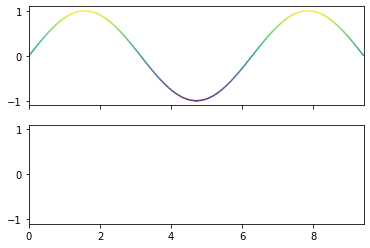

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# norm = plt.Normalize(y.min(), y.max())
lc = LineCollection(segments, cmap='viridis')
# Set the values used for colormapping
lc.set_array(y)
# lc.set_linewidth(2)
line = axs[0].add_collection(lc)

# # Use a boundary norm instead
# cmap = ListedColormap(['r', 'g', 'b'])
# norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
# lc = LineCollection(segments, cmap=cmap, norm=norm)
# lc.set_array(dydx)
# lc.set_linewidth(2)
# line = axs[1].add_collection(lc)

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()


In [ ]:
# points = np.array([np.array(epochs), np.array(train_loss)]).T.reshape(-1, 1, 2)
# segments = np.concatenate([points[:-1], points[1:]], axis=1)
# lc = LineCollection(segments, cmap='viridis')
# lc.set_array(np.array(epochs))
# axs.add_collection(lc)
# axs.set_xlim(0, max(epochs))
# axs.set_ylim(0, max(train_loss) + 0.1)


In [3]:
dict1 = {'user': 'runoob', 'num': [1, 2, 3]}

dict2 = dict1          # 浅拷贝: 引用对象
import copy
dict3 = copy.deepcopy(dict1)  # 浅拷贝：深拷贝父对象（一级目录），子对象（二级目录）不拷贝，还是引用

# 修改 data 数据
dict1['user'] = 'root'
dict1['num'].remove(1)

# 输出结果
print(dict1)
print(dict2)
print(dict3)


{'user': 'root', 'num': [2, 3]}
{'user': 'root', 'num': [2, 3]}
{'user': 'runoob', 'num': [1, 2, 3]}


In [302]:
import torch
from models import Mlp
from const import *
from utils import Data
import torch.nn.functional as F
dataset = WINE
train_data, test_data, ndim, nclass = Data().get(dataset)
x = train_data[0]
y = train_data[1]
test_data = test_data
model = Mlp(ndim, nclass)
if torch.cuda.is_available():
    model.cuda()
    x = x.cuda()
    y = y.cuda()

state_dict = torch.load("model/tmp")


In [303]:
model.load_state_dict(state_dict)
preds = model(x)
loss = F.cross_entropy(preds, y.long())
loss.item()
print(loss.item())


1.0918453931808472


In [304]:
for param in model.parameters():
    param.data += torch.randn(param.size())/100
preds = model(x)
loss = F.cross_entropy(preds, y.long())
loss.item()


1.0926202535629272

In [309]:
import pandas as pd
import sklearn.preprocessing as sp
import numpy as np

LabelIndex = 0
path = "data/wine/wine.data"
df = pd.read_csv(path, header=None)
dataset = np.column_stack((df.values[:, 1:],
                           sp.LabelEncoder().fit_transform(df[[LabelIndex]].values)))
dataset = np.array(dataset, dtype=float)
dataset = torch.Tensor(dataset)
if torch.cuda.is_available():
    dataset = dataset.cuda()
counter = {0:0,1:0,2:0}
train_index = []
test_index = []
for index in range(len(dataset)):
    item = dataset[index]
    if counter[int(item[-1])] < 40:
        counter[int(item[-1])] += 1
        train_index.append(index)
    else:
        test_index.append(index)
train_data = dataset.index_select(0, torch.tensor(train_index))
test_data = dataset.index_select(0, torch.tensor(test_index))
x_train = train_data[:,:-1]
y_train = train_data[:,-1]
x_test = test_data[:,:-1]
y_test = test_data[:,-1]
len(x_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


120

In [16]:
import torch.nn.functional as F
import torch
from utils import Data
train_data, test_data, ndim, nclass = Data().get(WINE)
F.one_hot(train_data[1].long())
# train_data[1].dtype

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 